In [32]:

using Interpolations, Optim, MAT, SparseArrays
using LaTeXStrings
using Plots
pyplot();

In [86]:
# using https://mark-ponder.com/tutorials/discrete-choice-models/dynamic-discrete-choice-nested-fixed-point-algorithm/
using Revise
includet("Rust_Zurcher.jl")
#include("Rust_Zurcher.jl")
using .Rust

In [259]:
n =4
m = Rust.Model(pi =[1/n for i in 1:n])

Main.Rust.Model(0.9999, [3.6, 10.0], [0.25, 0.25, 0.25, 0.25], [1.0; 1.0; … ; 1.0; 1.0], 90)

In [260]:
Rust.u(m)

2×90 Matrix{Float64}:
  -0.0036   -0.0072   -0.0108   -0.0144  …   -0.3168   -0.3204   -0.324
 -10.0     -10.0     -10.0     -10.0        -10.0     -10.0     -10.0

In [331]:
Rt  = Rust.transition_probs( m );

90×90 SparseMatrixCSC{Float64, Int64} with 354 stored entries:
⠙⢿⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠙⢿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠙⢿⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠙⢿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣦⡀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣄⡀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣦⡀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣄⡀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿

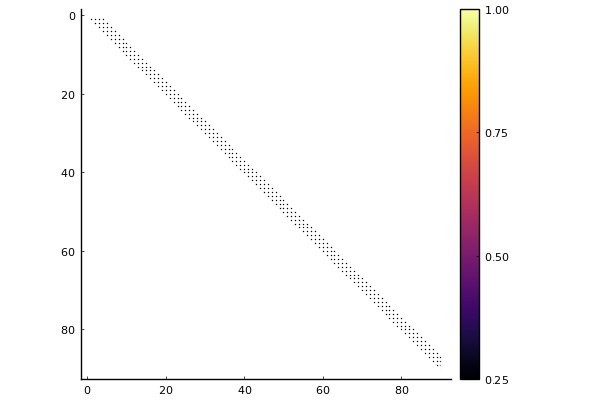

In [334]:
spy(Rt)

In [ ]:
## Data 
#rust_data = matread(dirname(pwd()) * "\\zurcher_matlab\\busdata1234.mat")
# mat data version is too old 

In [ ]:
using MAT

In [ ]:
#rust_data = matopen(dirname(pwd()) * "\\zurcher_matlab\\busdata1234.mat")
rust_data = matread(pwd() * "\\data\\zurcher.mat")

Dict{String, Any} with 1 entry:
  "data" => [4403.0 1.0 … 504.0 504.0; 4403.0 1.0 … 2705.0 2201.0; … ; 5333.0 4…

In [ ]:
rust_data["data"]

8260×9 Matrix{Float64}:
 4403.0  1.0  83.0   5.0  0.0       0.0     504.0     504.0   504.0
 4403.0  1.0  83.0   6.0  0.0     504.0    2705.0    2705.0  2201.0
 4403.0  1.0  83.0   7.0  0.0    2705.0    7345.0    7345.0  4640.0
 4403.0  1.0  83.0   8.0  0.0    7345.0   11591.0   11591.0  4246.0
 4403.0  1.0  83.0   9.0  0.0   11591.0   16057.0   16057.0  4466.0
 4403.0  1.0  83.0  10.0  0.0   16057.0   20796.0   20796.0  4739.0
 4403.0  1.0  83.0  11.0  0.0   20796.0   25299.0   25299.0  4503.0
 4403.0  1.0  83.0  12.0  0.0   25299.0   29311.0   29311.0  4012.0
 4403.0  1.0  84.0   1.0  0.0   29311.0   34621.0   34621.0  5310.0
 4403.0  1.0  84.0   2.0  0.0   34621.0   39738.0   39738.0  5117.0
 4403.0  1.0  84.0   3.0  0.0   39738.0   42477.0   42477.0  2739.0
 4403.0  1.0  84.0   4.0  0.0   42477.0   47038.0   47038.0  4561.0
 4403.0  1.0  84.0   5.0  0.0   47038.0   52917.0   52917.0  5879.0
    ⋮                               ⋮                        
 5333.0  4.0  84.0   5.0  0.0 